<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia_eda_analysis/blob/main/EDA_09_Machine_Learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Library Imports**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import io

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [58]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Load Cleaned Data**


In [59]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_12.xlsx')

In [60]:
df.head()

,DM_Type2,OP,Total_Number_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,1,1,4,50.2,12.5,1.21,32.0,1.81,1.00,27.8,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,37.3,8.7,1.18,33.0,1.20,0.96,31.2,...,False,True,False,False,False,False,False,False,False,True
3,0,1,5,29.5,8.3,1.23,25.0,1.11,1.03,26.6,...,False,False,False,False,True,False,False,False,True,False
4,0,0,3,39.5,11.0,1.31,31.0,1.26,0.97,31.3,...,False,False,False,True,False,False,False,False,True,False


In [61]:
sorted(df.columns)

['AT',
 'Age_Group_AGE 60-80',
 'Age_Group_AGE 80-100',
 'BMI',
 'CST',
 'Chronic_Diseases_COPD',
 'Chronic_Diseases_Dyslipidemia',
 'Chronic_Diseases_Hipotiroidi',
 'Chronic_Diseases_KAH',
 'DM_Type2',
 'Education_Primary School',
 'Education_Secondary School',
 'Education_University',
 'Education_illiterate',
 'Exercise_Status_1-2/week',
 'Exercise_Status_3-4/week',
 'Gait_Speed',
 'Gender_M',
 'Grip_Str',
 'Job_farmer',
 'Job_health care personel',
 'Job_housewife',
 'Job_numbers_below_ten',
 'Job_public officer',
 'Job_retired',
 'Job_security_personel',
 'Job_self-employment',
 'Job_teacher',
 'Job_white_collar_below_55',
 'Job_worker',
 'OP',
 'STAR',
 'Sarcopenia',
 'Total_Number_of_Chronic_Diseases',
 'Waist_Hip_Ratio',
 'Work_Status_unknown',
 'Work_Status_working']

In [62]:
df.isnull().sum()

,0
DM_Type2,0
OP,0
Total_Number_of_Chronic_Diseases,0
AT,0
CST,0
Gait_Speed,0
Grip_Str,0
STAR,0
Waist_Hip_Ratio,0
BMI,0


**Step 3: Define Features (X) and Target (y)**


In [63]:
X = df.drop('Sarcopenia', axis=1)
y = df['Sarcopenia']

**Phase 2: Initial Model Application (Full Dataset)**

**Step 4: Split Data into Training and Testing Sets (Full Dataset)**
* **Action:** Full dataset was divided into training and testing sets. This ensures to evaluate the model on unseen data. A common split is 70-80% for training and 20-30% for testing. I chose 25% to 75%.
* **Consideration:** I used `stratify=y` since our target variable is imbalanced to ensure a proportional representation of classes in both train and test sets.

In [64]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

**Step 5: Train Initial Decision Tree Model (Full Dataset)**
* **Action:** Instantiate and train a Decision Tree Classifier.
* **Consideration:** For initial models, lets start with default parameters.

In [65]:
dt_classifier_full = DecisionTreeClassifier(random_state=42)
dt_classifier_full.fit(X_train_full, y_train_full)

DecisionTreeClassifier(random_state=42)

**Step 6: Evaluate Initial Decision Tree Model (Full Dataset)**
* **Action:** Make predictions on the test set and calculate the specified evaluation metrics.
* **Metrics:** Accuracy, Precision, Recall, F1-Score.

In [66]:
y_pred_dt_full = dt_classifier_full.predict(X_test_full)

accuracy_dt_full = accuracy_score(y_test_full, y_pred_dt_full)
precision_dt_full = precision_score(y_test_full, y_pred_dt_full)
recall_dt_full = recall_score(y_test_full, y_pred_dt_full)
f1_dt_full = f1_score(y_test_full, y_pred_dt_full)

print(f"Decision Tree (Full Data) - Accuracy: {accuracy_dt_full:.4f}")
print(f"Decision Tree (Full Data) - Precision: {precision_dt_full:.4f}")
print(f"Decision Tree (Full Data) - Recall: {recall_dt_full:.4f}")
print(f"Decision Tree (Full Data) - F1-Score: {f1_dt_full:.4f}")



Decision Tree (Full Data) - Accuracy: 0.9944
Decision Tree (Full Data) - Precision: 0.9844
Decision Tree (Full Data) - Recall: 0.9882
Decision Tree (Full Data) - F1-Score: 0.9863


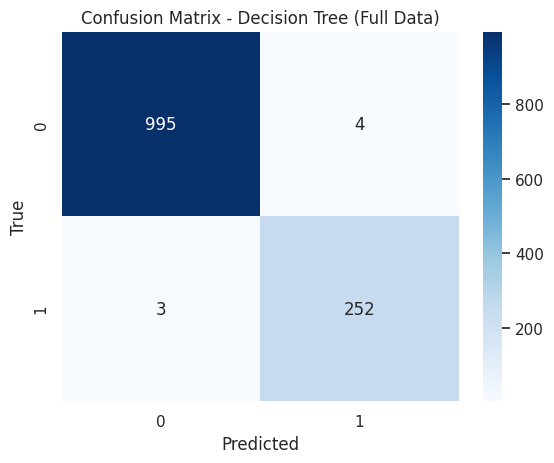

In [67]:
# Confusion Matrix
cm_dt_full = confusion_matrix(y_test_full, y_pred_dt_full)
sns.heatmap(cm_dt_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Full Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 7: Train Initial XGBoost Model (Full Dataset)**
* **Action:** Instantiate and train an XGBoost Classifier.

In [68]:
xgb_classifier_full = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # 'logloss' for binary classification
xgb_classifier_full.fit(X_train_full, y_train_full)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:22:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Step 8: Evaluate Initial XGBoost Model (Full Dataset)**
* **Action:** Make predictions on the test set and calculate the specified evaluation metrics.

In [69]:
    y_pred_xgb_full = xgb_classifier_full.predict(X_test_full)

    accuracy_xgb_full = accuracy_score(y_test_full, y_pred_xgb_full)
    precision_xgb_full = precision_score(y_test_full, y_pred_xgb_full)
    recall_xgb_full = recall_score(y_test_full, y_pred_xgb_full)
    f1_xgb_full = f1_score(y_test_full, y_pred_xgb_full)

    print(f"XGBoost (Full Data) - Accuracy: {accuracy_xgb_full:.4f}")
    print(f"XGBoost (Full Data) - Precision: {precision_xgb_full:.4f}")
    print(f"XGBoost (Full Data) - Recall: {recall_xgb_full:.4f}")
    print(f"XGBoost (Full Data) - F1-Score: {f1_xgb_full:.4f}")

XGBoost (Full Data) - Accuracy: 0.9968
XGBoost (Full Data) - Precision: 1.0000
XGBoost (Full Data) - Recall: 0.9843
XGBoost (Full Data) - F1-Score: 0.9921


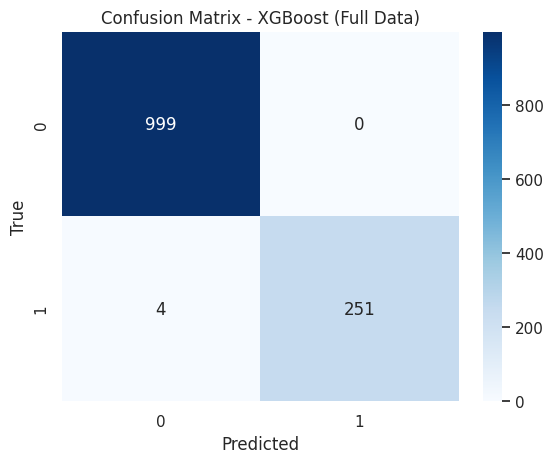

In [70]:
# Confusion Matrix
cm_xgb_full = confusion_matrix(y_test_full, y_pred_xgb_full)
sns.heatmap(cm_xgb_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Full Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Phase 3: Training Models on Subsets of Data**

**Step 9: Create Data Subsets (4,000 and 5,000 Patients)**
* **Action:** Original dataset was randomly sampled to create subsets of 4,000 and 5,000 patients.
* **Consideration:** The subsets were also stratified to maintain class distribution, especially since the dataset is imbalanced.

In [71]:
if len(df) < 4000:
  print("Warning: Dataset has less than 4,000 patients. Cannot create 4,000 patient subset.")
  df_4000 = None
else:
  # Stratified sampling for df_4000
  # Group by the target variable and sample from each group proportionally
  df_4000 = df.groupby('Sarcopenia').sample(n=int(4000 * df['Sarcopenia'].value_counts(normalize=True)[1]), random_state=42)
  # If the above leads to slightly less or more than n due to rounding, you might need to adjust
  # A safer way to ensure exactly n samples is to oversample/undersample from groups as needed or adjust n slightly
  # However, for demonstration and approximate subsets, this proportional sampling is common.

  # The following line ensures we have exactly 4000 rows if proportional sampling didn't achieve it exactly
  # This can introduce slight deviation from perfect stratification if counts are very small
  # A more robust approach might involve ensuring a minimum number of samples per group before sampling
  if len(df_4000) < 4000:
      remaining_samples = 4000 - len(df_4000)
      # Find rows not yet sampled and sample the remainder, ensuring no duplicates
      remaining_df = df[~df.index.isin(df_4000.index)]
      df_4000 = pd.concat([df_4000, remaining_df.sample(n=remaining_samples, random_state=42)])
  elif len(df_4000) > 4000:
       df_4000 = df_4000.sample(n=4000, random_state=42)


  X_4000 = df_4000.drop('Sarcopenia', axis=1)
  y_4000 = df_4000['Sarcopenia']
  # Now perform a stratified train-test split on the stratified subset
  X_train_4000, X_test_4000, y_train_4000, y_test_4000 = train_test_split(X_4000, y_4000, test_size=0.25, random_state=42, stratify=y_4000)


if len(df) < 5000:
  print("Warning: Dataset has less than 5,000 patients. Cannot create 5,000 patient subset.")
  df_5000 = None
else:
    # Stratified sampling for df_5000
    df_5000 = df.groupby('Sarcopenia').sample(n=int(5000 * df['Sarcopenia'].value_counts(normalize=True)[1]), random_state=42)

    if len(df_5000) < 5000:
        remaining_samples = 5000 - len(df_5000)
        remaining_df = df[~df.index.isin(df_5000.index)]
        df_5000 = pd.concat([df_5000, remaining_df.sample(n=remaining_samples, random_state=42)])
    elif len(df_5000) > 5000:
        df_5000 = df_5000.sample(n=5000, random_state=42)


    X_5000 = df_5000.drop('Sarcopenia', axis=1)
    y_5000 = df_5000['Sarcopenia']
    # Now perform a stratified train-test split on the stratified subset
    X_train_5000, X_test_5000, y_train_5000, y_test_5000 = train_test_split(X_5000, y_5000, test_size=0.25, random_state=42, stratify=y_5000)

**Step 10: Train and Evaluate Decision Tree on 4,000 Patient Subset**
* **Action:** Repeat Steps 5 and 6 using the 4,000 patient subset.

In [72]:
if df_4000 is not None:
  dt_classifier_4000 = DecisionTreeClassifier(random_state=42)
  dt_classifier_4000.fit(X_train_4000, y_train_4000)
  y_pred_dt_4000 = dt_classifier_4000.predict(X_test_4000)

  accuracy_dt_4000 = accuracy_score(y_test_4000, y_pred_dt_4000)
  precision_dt_4000 = precision_score(y_test_4000, y_pred_dt_4000)
  recall_dt_4000 = recall_score(y_test_4000, y_pred_dt_4000)
  f1_dt_4000 = f1_score(y_test_4000, y_pred_dt_4000)

  print(f"\nDecision Tree (4,000 Patients) - Accuracy: {accuracy_dt_4000:.4f}")
  print(f"Decision Tree (4,000 Patients) - Precision: {precision_dt_4000:.4f}")
  print(f"Decision Tree (4,000 Patients) - Recall: {recall_dt_4000:.4f}")
  print(f"Decision Tree (4,000 Patients) - F1-Score: {f1_dt_4000:.4f}")


Decision Tree (4,000 Patients) - Accuracy: 0.9920
Decision Tree (4,000 Patients) - Precision: 0.9875
Decision Tree (4,000 Patients) - Recall: 0.9793
Decision Tree (4,000 Patients) - F1-Score: 0.9834


**Step 11: Train and Evaluate XGBoost on 4,000 Patient Subset**
* **Action:** Repeat Steps 7 and 8 using the 4,000 patient subset.

In [73]:
if df_4000 is not None:
  xgb_classifier_4000 = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_classifier_4000.fit(X_train_4000, y_train_4000)
  y_pred_xgb_4000 = xgb_classifier_4000.predict(X_test_4000)

  accuracy_xgb_4000 = accuracy_score(y_test_4000, y_pred_xgb_4000)
  precision_xgb_4000 = precision_score(y_test_4000, y_pred_xgb_4000)
  recall_xgb_4000 = recall_score(y_test_4000, y_pred_xgb_4000)
  f1_xgb_4000 = f1_score(y_test_4000, y_pred_xgb_4000)

  print(f"\nXGBoost (4,000 Patients) - Accuracy: {accuracy_xgb_4000:.4f}")
  print(f"XGBoost (4,000 Patients) - Precision: {precision_xgb_4000:.4f}")
  print(f"XGBoost (4,000 Patients) - Recall: {recall_xgb_4000:.4f}")
  print(f"XGBoost (4,000 Patients) - F1-Score: {f1_xgb_4000:.4f}")


XGBoost (4,000 Patients) - Accuracy: 0.9950
XGBoost (4,000 Patients) - Precision: 1.0000
XGBoost (4,000 Patients) - Recall: 0.9793
XGBoost (4,000 Patients) - F1-Score: 0.9896


**Step 12: Train and Evaluate Decision Tree on 5,000 Patient Subset**
* **Action:** Repeat Steps 5 and 6 using the 5,000 patient subset.

In [74]:
if df_5000 is not None:
  dt_classifier_5000 = DecisionTreeClassifier(random_state=42)
  dt_classifier_5000.fit(X_train_5000, y_train_5000)
  y_pred_dt_5000 = dt_classifier_5000.predict(X_test_5000)

  accuracy_dt_5000 = accuracy_score(y_test_5000, y_pred_dt_5000)
  precision_dt_5000 = precision_score(y_test_5000, y_pred_dt_5000)
  recall_dt_5000 = recall_score(y_test_5000, y_pred_dt_5000)
  f1_dt_5000 = f1_score(y_test_5000, y_pred_dt_5000)

  print(f"\nDecision Tree (5,000 Patients) - Accuracy: {accuracy_dt_5000:.4f}")
  print(f"Decision Tree (5,000 Patients) - Precision: {precision_dt_5000:.4f}")
  print(f"Decision Tree (5,000 Patients) - Recall: {recall_dt_5000:.4f}")
  print(f"Decision Tree (5,000 Patients) - F1-Score: {f1_dt_5000:.4f}")


Decision Tree (5,000 Patients) - Accuracy: 0.9968
Decision Tree (5,000 Patients) - Precision: 0.9883
Decision Tree (5,000 Patients) - Recall: 0.9961
Decision Tree (5,000 Patients) - F1-Score: 0.9922


**Step 13: Train and Evaluate XGBoost on 5,000 Patient Subset**
* **Action:** Repeat Steps 7 and 8 using the 5,000 patient subset.

In [75]:
if df_5000 is not None:
  xgb_classifier_5000 = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_classifier_5000.fit(X_train_5000, y_train_5000)
  y_pred_xgb_5000 = xgb_classifier_5000.predict(X_test_5000)

  accuracy_xgb_5000 = accuracy_score(y_test_5000, y_pred_xgb_5000)
  precision_xgb_5000 = precision_score(y_test_5000, y_pred_xgb_5000)
  recall_xgb_5000 = recall_score(y_test_5000, y_pred_xgb_5000)
  f1_xgb_5000 = f1_score(y_test_5000, y_pred_xgb_5000)

  print(f"\nXGBoost (5,000 Patients) - Accuracy: {accuracy_xgb_5000:.4f}")
  print(f"XGBoost (5,000 Patients) - Precision: {precision_xgb_5000:.4f}")
  print(f"XGBoost (5,000 Patients) - Recall: {recall_xgb_5000:.4f}")
  print(f"XGBoost (5,000 Patients) - F1-Score: {f1_xgb_5000:.4f}")


XGBoost (5,000 Patients) - Accuracy: 0.9976
XGBoost (5,000 Patients) - Precision: 1.0000
XGBoost (5,000 Patients) - Recall: 0.9882
XGBoost (5,000 Patients) - F1-Score: 0.9941


**Phase 4. Comparative Analysis and Reporting**

**Step 14: Consolidate and Present Results**

In [76]:
results = {
        'Model': ['Decision Tree (Full)', 'XGBoost (Full)',
                  'Decision Tree (4K)', 'XGBoost (4K)',
                  'Decision Tree (5K)', 'XGBoost (5K)'],
        'Accuracy': [accuracy_dt_full, accuracy_xgb_full,
                     accuracy_dt_4000 if df_4000 is not None else np.nan, accuracy_xgb_4000 if df_4000 is not None else np.nan,
                     accuracy_dt_5000 if df_5000 is not None else np.nan, accuracy_xgb_5000 if df_5000 is not None else np.nan],
        'Precision': [precision_dt_full, precision_xgb_full,
                      precision_dt_4000 if df_4000 is not None else np.nan, precision_xgb_4000 if df_4000 is not None else np.nan,
                      precision_dt_5000 if df_5000 is not None else np.nan, precision_xgb_5000 if df_5000 is not None else np.nan],
        'Recall': [recall_dt_full, recall_xgb_full,
                   recall_dt_4000 if df_4000 is not None else np.nan, recall_xgb_4000 if df_4000 is not None else np.nan,
                   recall_dt_5000 if df_5000 is not None else np.nan, recall_xgb_5000 if df_5000 is not None else np.nan],
        'F1-Score': [f1_dt_full, f1_xgb_full,
                     f1_dt_4000 if df_4000 is not None else np.nan, f1_xgb_4000 if df_4000 is not None else np.nan,
                     f1_dt_5000 if df_5000 is not None else np.nan, f1_xgb_5000 if df_5000 is not None else np.nan]
    }
results_df = pd.DataFrame(results)
print("\n--- Model Performance Summary ---")
print(results_df.round(4))


--- Model Performance Summary ---
                  Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree (Full)    0.9944     0.9844  0.9882    0.9863
1        XGBoost (Full)    0.9968     1.0000  0.9843    0.9921
2    Decision Tree (4K)    0.9920     0.9875  0.9793    0.9834
3          XGBoost (4K)    0.9950     1.0000  0.9793    0.9896
4    Decision Tree (5K)    0.9968     0.9883  0.9961    0.9922
5          XGBoost (5K)    0.9976     1.0000  0.9882    0.9941


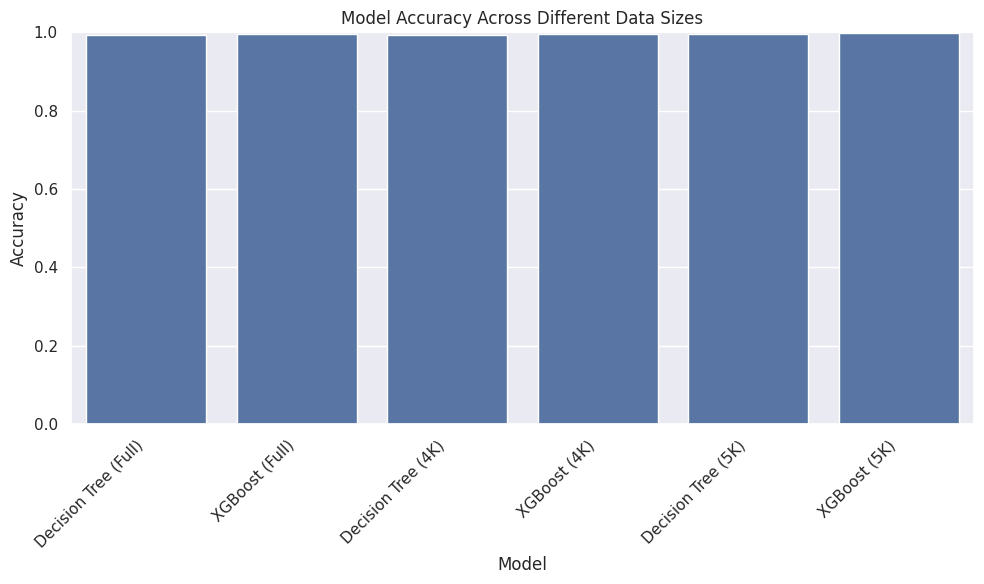

In [77]:
# Visualization (Accuracy Comparison)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Across Different Data Sizes')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Step 15: Interpreting the Results and Conclusion**


    Model XGBoost performed best overall since F1-Scores for all data set (4,000 vs. 5,000 vs. full) results are higher than that of Model Decision Tree. The F1-score is often a good overall metric when you need a balance between minimizing both false positives and false negatives, and when your dataset is imbalanced. In our case, we have 20% of observations has sarcopenia disease.  

    All in all, there is no significant differences between them. The results are very close. On the other hand, since it is a medical condition prediction case, it is better to use recall parameter to compare two models. By means of recal parameter, it is possible to catch missing positives which is very important medical wise.

    If we take recall parameter into consideration, it can be said that Model Decision Tree is better predictor model than XGBoost in our case.
